# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | rincon
Processing Record 10 of Set 1 | warqla
City not found. Skipping...
Processing Record 11 of Set 1 | san marcos
Processing Record 12 of Set 1 | hailey
Processing Record 13 of Set 1 | tacuarembo
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | elliot

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.18,81,99,8.97,KI,1675998230
1,cabo san lucas,22.8909,-109.9124,20.28,65,0,1.54,MX,1675998230
2,dikson,73.5069,80.5464,-15.92,93,100,13.65,RU,1675998231
3,sinnamary,5.3833,-52.9500,24.53,87,80,4.81,GF,1675998231
4,kapaa,22.0752,-159.3190,25.18,75,75,8.75,US,1675998232


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.18,81,99,8.97,KI,1675998230
1,cabo san lucas,22.8909,-109.9124,20.28,65,0,1.54,MX,1675998230
2,dikson,73.5069,80.5464,-15.92,93,100,13.65,RU,1675998231
3,sinnamary,5.3833,-52.9500,24.53,87,80,4.81,GF,1675998231
4,kapaa,22.0752,-159.3190,25.18,75,75,8.75,US,1675998232


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

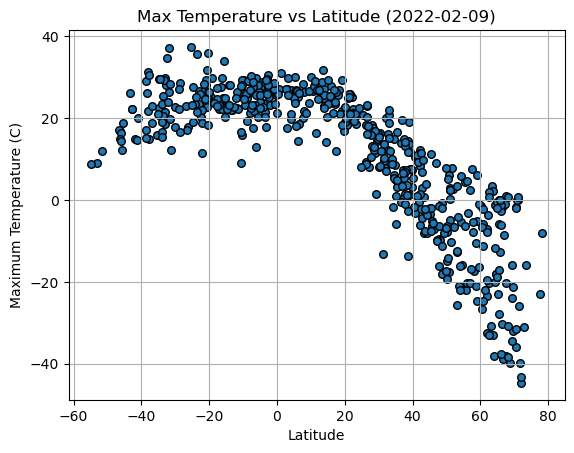

In [14]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 30, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('Max Temperature vs Latitude (2022-02-09)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

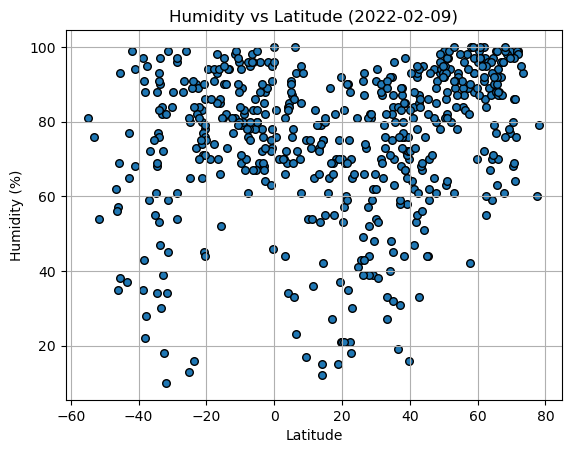

In [15]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 30, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('Humidity vs Latitude (2022-02-09)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

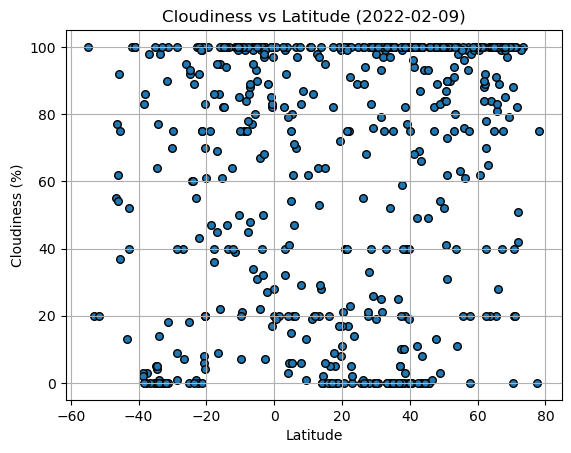

In [16]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 30, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('Cloudiness vs Latitude (2022-02-09)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

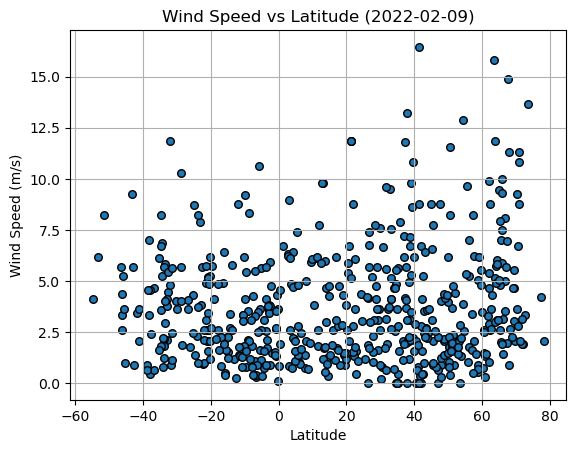

In [17]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 30, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('Wind Speed vs Latitude (2022-02-09)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def lin_regress_plt(x, y, xl, yl, text_coordinate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    r = rvalue
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    print(f"The r-value is: {r}")
    plt.annotate(line_eq, text_coordinate, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{xl}")
    plt.ylabel(f"{yl}")
    plt.grid()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.18,81,99,8.97,KI,1675998230
1,cabo san lucas,22.8909,-109.9124,20.28,65,0,1.54,MX,1675998230
2,dikson,73.5069,80.5464,-15.92,93,100,13.65,RU,1675998231
3,sinnamary,5.3833,-52.9500,24.53,87,80,4.81,GF,1675998231
4,kapaa,22.0752,-159.3190,25.18,75,75,8.75,US,1675998232


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,hobart,-42.8794,147.3294,22.35,77,40,5.66,AU,1675998051
10,tacuarembo,-31.7333,-55.9833,26.50,34,90,0.86,UY,1675998128
11,vaini,-21.2000,-175.2000,28.09,83,75,2.57,TO,1675998236
12,atuona,-9.8000,-139.0333,26.12,79,7,9.21,PF,1675998237
16,rikitea,-23.1203,-134.9692,26.70,73,1,7.89,PF,1675998239


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8594735707372497


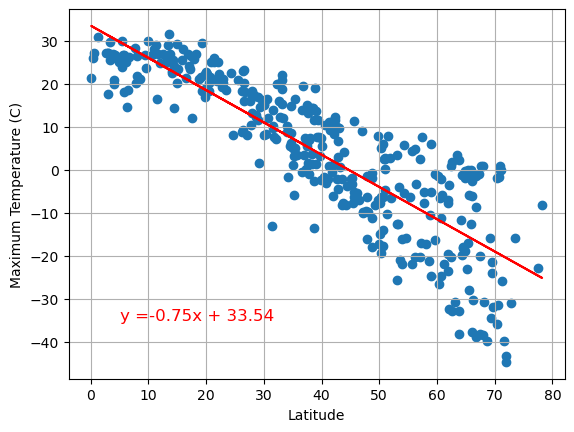

In [31]:
# Linear regression on Northern Hemisphere
lin_regress_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Maximum Temperature (C)', (5, -35))

The r-value is: 0.3668932490729621


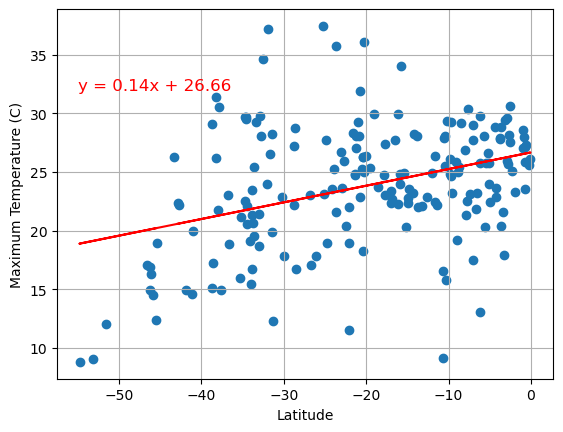

In [34]:
# Linear regression on Southern Hemisphere
lin_regress_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Maximum Temperature (C)', (-55, 32))

**Discussion about the linear relationship:** During this time of the year, the max temperature of cities in Northern Hemisphere are very strongly negatively correlated to the latitude. This implies, further north you go, the lower the max temperature. On the other hand, for the cities in Southern Hemisphere, the max temperature is positively correlated, but not as strongly. This means the further South you go and get closer to the South Pole, the colder it gets. This relationship is not as strong though. Overall, highest temperatures are observed around the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39898244867757837


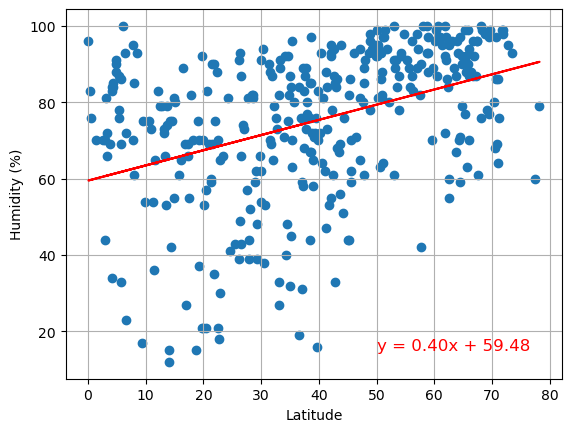

In [36]:
# Northern Hemisphere
lin_regress_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', (50, 15))

The r-value is: 0.3220436984239572


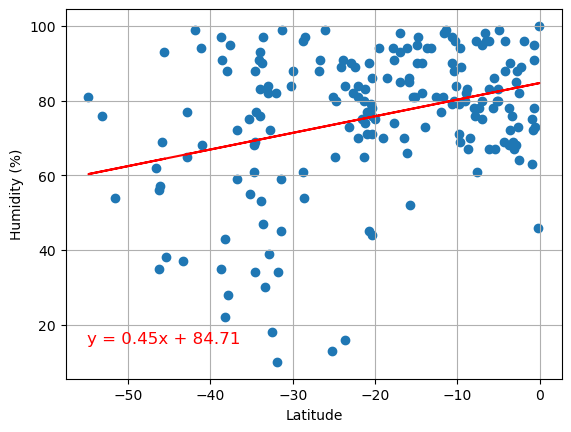

In [37]:
# Southern Hemisphere
lin_regress_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', (-55, 15))

**Discussion about the linear relationship:** For both hemispheres, we only see a weak positive correlation between latitude and Humidity. The correlation value is very similar for both hemispheres. From this weak correlation, it seems like the humidity increases as you move up further north in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3219276316993229


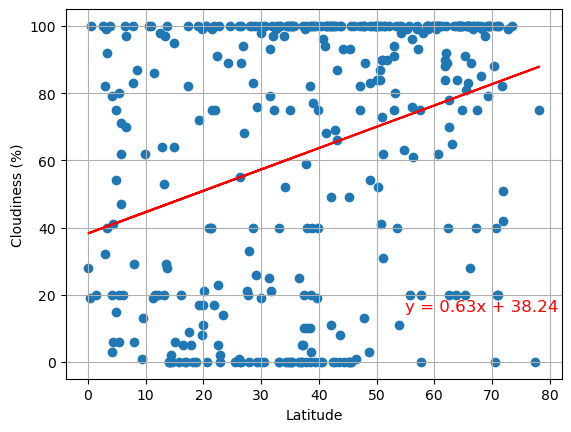

In [39]:
# Northern Hemisphere
lin_regress_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', (55, 15))

The r-value is: 0.37384260765126115


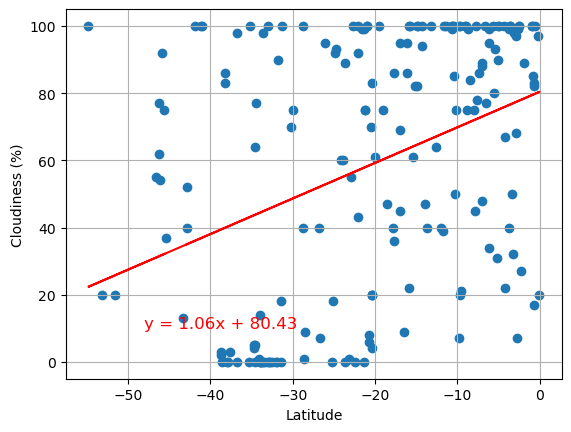

In [41]:
# Southern Hemisphere
lin_regress_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', (-48, 10))

**Discussion about the linear relationship:** Similar to humidity, we see a weak positive correlation between cloudiness and latitude. The correlation values are always similar to that between humidity and latitude. So, again similar to humidity, the cloudiness increases as you move further up North. This makes sense when considered along with the humidity vs latitude correlation, because the more humid a region, the more water in the air, and more the chance for cloud formations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1277170015806762


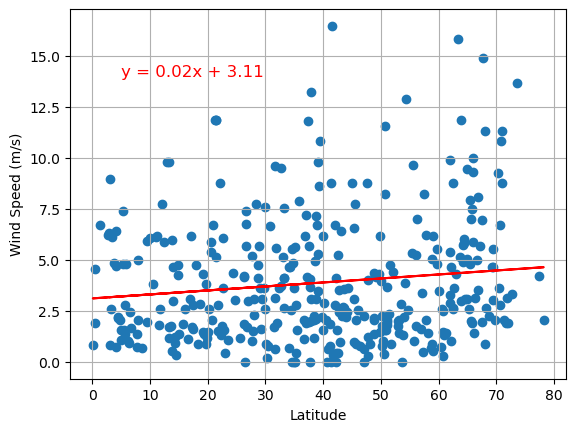

In [43]:
# Northern Hemisphere
lin_regress_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', (5, 14))

The r-value is: -0.22425983070705807


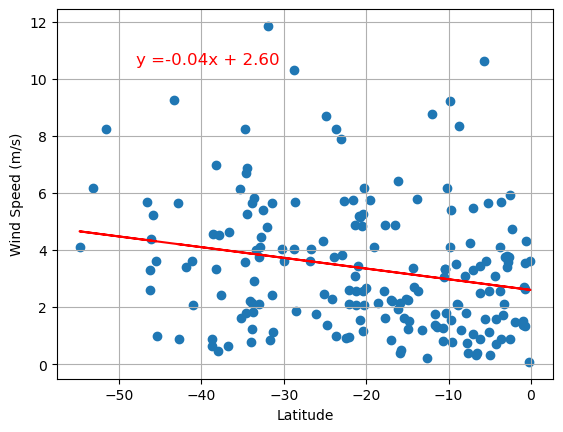

In [47]:
# Southern Hemisphere
lin_regress_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', (-48, 10.5))

**Discussion about the linear relationship:** The correlation values between latitude and wind speed for either hemisphere is extremely weak to draw any conclusions. 